In [2]:
import numpy as np
import pandas as pd
import re
import os
os.chdir(r'C:\Post Graduate Course in Data Analytics\KAGGLE DATASETS & SCRIPTS\AMAZON REVIEWS SENTIMENT')

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [165]:
df=pd.read_csv('Reviews.csv')
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [166]:
df.shape

(568454, 10)

In [167]:
df=df.sample(frac=0.2,replace=True).reset_index(drop=True)
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,131351,B0054ETSO6,AOBARLJKWU4O5,Justin,0,0,5,1350777600,Perfect prop for Breaking Bad Costume,I bought this product for my Breaking Bad Hall...
1,303248,B0002DGRZC,A3KXPLKL5EPJX,Judith M Dell,0,0,5,1350777600,Dogs LOVE it!! Plus it is healthy...,My dog would do anything for his liver treats!...
2,76551,B0049ULB78,A23WIZX2TZ220,"S. LEECH ""BudgetAudiophile""",0,0,5,1344816000,Good coffee,Just finished off my first Amazon packaged (50...
3,320323,B003Z6W32E,A2VGU1H26WZEZG,Punk,3,3,5,1288742400,Instant brew!,"In my search for instant java fix, I have samp..."
4,548131,B007RTR9G0,A38Z8ZXX1BPFRL,"Melodie ""2kidznus""",1,1,1,1338768000,Like the smell but it left my hair greasy..had...,This is not a product I can use. It left my h...
...,...,...,...,...,...,...,...,...,...,...
113686,94427,B000EQYW0E,AHWXH8CA96IBX,Alan Kaye,29,31,5,1153526400,"The best chips ever invented, truly the pinnac...","Fate has smiled upon you today, for you have s..."
113687,292046,B001EO5Y8Y,A2UQXRR458CWZV,Shari Best,0,0,5,1348617600,"Green Mountain Coffee, Dark Magic k-cup",I've been drinking this for quite awhile now a...
113688,465268,B000FSRN7U,A1KDCAP54QTZKA,"Marcus Aurelius ""Marcus Aurelius""",0,0,2,1249603200,Salty & Greasy,"I really like ChooChoo R Snacks Jerky, their q..."
113689,379226,B001TM70XS,A3D0J18LY62I06,"Cat Guy ""Mr Poofy's Cat Guy""",10,10,5,1266969600,Its just chicken and gravy - my cats love this...,I love this food for my kitties! Mr poof devo...


In [168]:
df.shape

(113691, 10)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113691 entries, 0 to 113690
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      113691 non-null  int64 
 1   ProductId               113691 non-null  object
 2   UserId                  113691 non-null  object
 3   ProfileName             113687 non-null  object
 4   HelpfulnessNumerator    113691 non-null  int64 
 5   HelpfulnessDenominator  113691 non-null  int64 
 6   Score                   113691 non-null  int64 
 7   Time                    113691 non-null  int64 
 8   Summary                 113685 non-null  object
 9   Text                    113691 non-null  object
dtypes: int64(5), object(5)
memory usage: 8.7+ MB


In [170]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               4
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   6
Text                      0
dtype: int64

In [171]:
df.dropna(inplace=True)

In [172]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [173]:
df.reset_index(drop=True,inplace=True)

In [174]:
rating_pct=df['Score'].value_counts()/len(df)*100
rating_pct

5    63.736244
4    14.341887
1     9.070997
3     7.628364
2     5.222509
Name: Score, dtype: float64

In [175]:
wordsperreview=df['Text'].apply(lambda x: len(x.split(' ')))
wordsperreview

0          30
1          61
2         162
3          78
4         128
         ... 
113676    180
113677     28
113678    111
113679    102
113680    130
Name: Text, Length: 113681, dtype: int64

In [176]:
txt=' '.join(review for review in df.Text)

In [177]:
wordcloud=WordCloud(background_color='white',max_font_size=100,max_words=100,width=800,height=800).generate(txt)

In [152]:
import matplotlib.pyplot as plt

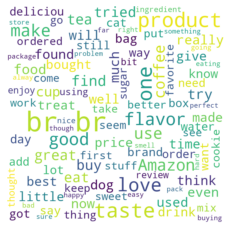

In [178]:
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [179]:
df=pd.DataFrame(df,columns=['Score','Text'])
df.rename(columns={'Score':'Rating','Text':'Review'},inplace=True)

In [180]:
df

,Rating,Review
0,5,I bought this product for my Breaking Bad Hall...
1,5,My dog would do anything for his liver treats!...
2,5,Just finished off my first Amazon packaged (50...
3,5,"In my search for instant java fix, I have samp..."
4,1,This is not a product I can use. It left my h...
...,...,...
113676,5,"Fate has smiled upon you today, for you have s..."
113677,5,I've been drinking this for quite awhile now a...
113678,2,"I really like ChooChoo R Snacks Jerky, their q..."
113679,5,I love this food for my kitties! Mr poof devo...


In [181]:
def apply_sentiment(Rating):
    if Rating<=4:
        return 0
    else:
        return 1

In [182]:
df['Sentiment']=df['Rating'].apply(apply_sentiment)

In [183]:
df

,Rating,Review,Sentiment
0,5,I bought this product for my Breaking Bad Hall...,1
1,5,My dog would do anything for his liver treats!...,1
2,5,Just finished off my first Amazon packaged (50...,1
3,5,"In my search for instant java fix, I have samp...",1
4,1,This is not a product I can use. It left my h...,0
...,...,...,...
113676,5,"Fate has smiled upon you today, for you have s...",1
113677,5,I've been drinking this for quite awhile now a...,1
113678,2,"I really like ChooChoo R Snacks Jerky, their q...",0
113679,5,I love this food for my kitties! Mr poof devo...,1


In [184]:
df.drop('Rating',axis=1,inplace=True)

In [185]:
df.Sentiment.value_counts()

1    72456
0    41225
Name: Sentiment, dtype: int64

In [186]:
def clean_text(review):
    review=str(review).lower()
    review=re.sub('\[.*?\]','',review)
    review=re.sub('https?://\S+|www\.\S+','',review)
    review=re.sub('<.*?>+','',review)
    review=re.sub(r'[^a-zA-Z0-9\s]','',review)
    review=re.sub('\n','',review)
    review=re.sub('\w*\d\w*','',review)
    return review

In [187]:
df['Review']=df['Review'].apply(clean_text)

In [188]:
df

,Review,Sentiment
0,i bought this product for my breaking bad hall...,1
1,my dog would do anything for his liver treats ...,1
2,just finished off my first amazon packaged co...,1
3,in my search for instant java fix i have sampl...,1
4,this is not a product i can use it left my ha...,0
...,...,...
113676,fate has smiled upon you today for you have st...,1
113677,ive been drinking this for quite awhile now an...,1
113678,i really like choochoo r snacks jerky their qu...,0
113679,i love this food for my kitties mr poof devou...,1


In [189]:
from nltk.corpus import stopwords

In [190]:
stop_words=set(stopwords.words('english'))
stopword=[]
sentence=df['Review'][0]

def remove_stopwords(stop_words,sentence):
    return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]

In [191]:
df['reviews_text']=df['Review'].apply(lambda row: remove_stopwords(stop_words,row))

In [192]:
x=df['reviews_text']
y=df['Sentiment']

In [193]:
x

0         [bought, product, breaking, bad, halloween, co...
1         [dog, would, anything, liver, treats, whenever...
2         [finished, first, amazon, packaged, count, box...
3         [search, instant, java, fix, sampled, french, ...
4         [product, use, left, hair, greasy, applied, we...
                                ...                        
113676    [fate, smiled, upon, today, stumbled, upon, re...
113677    [ive, drinking, quite, awhile, disappointed, l...
113678    [really, like, choochoo, r, snacks, jerky, qua...
113679    [love, food, kitties, mr, poof, devours, stuff...
113680    [started, weight, watchers, november, august, ...
Name: reviews_text, Length: 113681, dtype: object

In [194]:
for i in range(0,113679):
    x[i]=' '.join(str(j) for j in x[i])

In [195]:
x[11801]

'resemblance beverage margarita purely coincidental touch salt sort cleaning product green kind tastes like honeydew melon family agreed idea supposed taste like might mind much im fan honeydew honeydew melon margarita suppose somewhat resembles gatorade color though saltyi even liked appletini flavor although never drunk actual appletinicontemplating conjures technicolor yawns youth margarita flavor dreadful free lunch low calorie margarita'

In [196]:
x

0         bought product breaking bad halloween costume ...
1         dog would anything liver treats whenever playm...
2         finished first amazon packaged count box impre...
3         search instant java fix sampled french german ...
4         product use left hair greasy applied wet hair ...
                                ...                        
113676    fate smiled upon today stumbled upon review be...
113677    ive drinking quite awhile disappointed like st...
113678    really like choochoo r snacks jerky quality ex...
113679    [love, food, kitties, mr, poof, devours, stuff...
113680    [started, weight, watchers, november, august, ...
Name: reviews_text, Length: 113681, dtype: object

In [205]:
x.drop(labels=[113679,113680],inplace=True)

In [206]:
y.drop(labels=[113679,113680],inplace=True)

In [207]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=47)

In [208]:
from sklearn.pipeline import Pipeline

In [209]:
clf=Pipeline([
    ('vect',TfidfVectorizer(stop_words='english')),
    ('classifier',LogisticRegression()),
])

In [210]:
model=clf.fit(xtrain,ytrain)

In [211]:
ypred=clf.predict(xtest)

In [212]:
model.score(xtrain,ytrain)

0.850972587224965

In [213]:
model.score(xtest,ytest)

0.8186136523574947

In [214]:
confusion_matrix(ytest,ypred)

array([[ 5523,  2713],
       [ 1411, 13089]], dtype=int64)

In [215]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73      8236
           1       0.83      0.90      0.86     14500

    accuracy                           0.82     22736
   macro avg       0.81      0.79      0.80     22736
weighted avg       0.82      0.82      0.81     22736



In [216]:
ypred

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)